In [1]:
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM,Activation,Dropout,SimpleRNN
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("Dataset_Rayong_TH.csv")

In [3]:
df

,YEAR,MO,DY,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,WS10M
0,2010,1,1,31.80,24.71,76.00,0.00,2.06
1,2010,1,2,32.30,24.18,74.25,0.00,2.16
2,2010,1,3,33.24,24.60,70.56,0.00,2.06
3,2010,1,4,31.37,24.49,80.00,0.10,2.86
4,2010,1,5,31.69,24.38,78.94,1.52,2.77
...,...,...,...,...,...,...,...,...
3648,2019,12,28,31.94,21.69,70.12,0.11,3.22
3649,2019,12,29,32.37,21.87,65.75,0.00,2.70
3650,2019,12,30,32.74,22.30,63.12,0.00,2.28
3651,2019,12,31,33.23,22.30,66.00,0.05,3.23


In [4]:
df = df.rename(columns={
    'T2M_MIN': 'minTemp',
    'T2M_MAX': 'maxTemp',
    'RH2M': 'RelativeHumidity',
    'PRECTOTCORR': 'Precipitation',
    'WS10M': 'WindSpeed'
})

In [5]:
df

,YEAR,MO,DY,maxTemp,minTemp,RelativeHumidity,Precipitation,WindSpeed
0,2010,1,1,31.80,24.71,76.00,0.00,2.06
1,2010,1,2,32.30,24.18,74.25,0.00,2.16
2,2010,1,3,33.24,24.60,70.56,0.00,2.06
3,2010,1,4,31.37,24.49,80.00,0.10,2.86
4,2010,1,5,31.69,24.38,78.94,1.52,2.77
...,...,...,...,...,...,...,...,...
3648,2019,12,28,31.94,21.69,70.12,0.11,3.22
3649,2019,12,29,32.37,21.87,65.75,0.00,2.70
3650,2019,12,30,32.74,22.30,63.12,0.00,2.28
3651,2019,12,31,33.23,22.30,66.00,0.05,3.23


In [6]:
df['Date'] = df['DY'].astype(str) + '/' + df['MO'].astype(str) + '/' + df['YEAR'].astype(str)

In [7]:
df = df.drop(['YEAR', 'MO', 'DY'], axis=1)

In [8]:
df = df[['Date','minTemp','maxTemp','RelativeHumidity','Precipitation','WindSpeed']]

In [9]:
df

,Date,minTemp,maxTemp,RelativeHumidity,Precipitation,WindSpeed
0,1/1/2010,24.71,31.80,76.00,0.00,2.06
1,2/1/2010,24.18,32.30,74.25,0.00,2.16
2,3/1/2010,24.60,33.24,70.56,0.00,2.06
3,4/1/2010,24.49,31.37,80.00,0.10,2.86
4,5/1/2010,24.38,31.69,78.94,1.52,2.77
...,...,...,...,...,...,...
3648,28/12/2019,21.69,31.94,70.12,0.11,3.22
3649,29/12/2019,21.87,32.37,65.75,0.00,2.70
3650,30/12/2019,22.30,32.74,63.12,0.00,2.28
3651,31/12/2019,22.30,33.23,66.00,0.05,3.23


In [10]:
# df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Dataset
Location: Latitude  12.8435   Longitude 101.4612 
Rayong, Thailand

1. min_temp(C): อุณหภูมิต่ำสุด
2. max_temp(C): อุณหภูมิสูงสุด
3. Relative_humidity(%): ความชื้นสัมพัทธ์
4. precipitation(mm/day): หยาดน้ำฟ้า
5. Wind_Speed(m/s): ความเร็วลม

Date: 2010-01-01 ถึง 2020-01-01

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3653 non-null   object 
 1   minTemp           3653 non-null   float64
 2   maxTemp           3653 non-null   float64
 3   RelativeHumidity  3653 non-null   float64
 4   Precipitation     3653 non-null   float64
 5   WindSpeed         3653 non-null   float64
dtypes: float64(5), object(1)
memory usage: 171.4+ KB


## Find same day in dataset

In [12]:
for i in range(len(df)-1):
    if df['Date'][i] == df['Date'][i+1]:
        print(i,df['Date'][i])

In [13]:
formular = 'maxTemp ~minTemp+WindSpeed+RelativeHumidity+Precipitation'

In [14]:
target = "maxTemp"

In [15]:
variable = formular.split('~')
print(variable)
variable = variable[1].split('+')
print(variable)

['maxTemp ', 'minTemp+WindSpeed+RelativeHumidity+Precipitation']
['minTemp', 'WindSpeed', 'RelativeHumidity', 'Precipitation']


In [16]:
variable = [ 'date' , target ] + variable

In [17]:
variable

['date',
 'maxTemp',
 'minTemp',
 'WindSpeed',
 'RelativeHumidity',
 'Precipitation']

In [18]:
nTar = len(variable)-1

## หาข้อมูลที่เป็น null

In [19]:
df.isnull().sum()

Date                0
minTemp             0
maxTemp             0
RelativeHumidity    0
Precipitation       0
WindSpeed           0
dtype: int64

In [20]:
count = (df['maxTemp'] == 0).sum()
print(count)

0


In [21]:
count = (df['minTemp'] == 0).sum()
print(count)

0


In [22]:
correlation_matrix = df[['minTemp', 'maxTemp', 'RelativeHumidity', 'Precipitation', 'WindSpeed']].corr()

In [23]:
correlation_matrix

,minTemp,maxTemp,RelativeHumidity,Precipitation,WindSpeed
minTemp,1.000000,0.418373,0.230844,0.209168,-0.148398
maxTemp,0.418373,1.000000,-0.673676,-0.347941,-0.205000
RelativeHumidity,0.230844,-0.673676,1.000000,0.473285,0.024409
Precipitation,0.209168,-0.347941,0.473285,1.000000,0.023713
WindSpeed,-0.148398,-0.205000,0.024409,0.023713,1.000000


<Axes: >

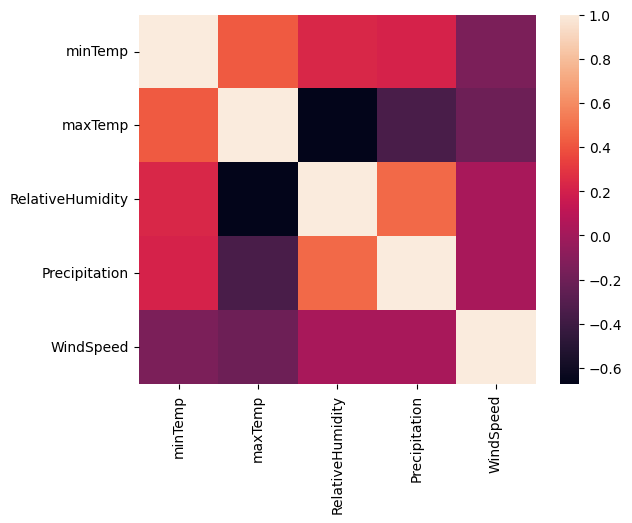

In [24]:
sn.heatmap( df[['minTemp', 'maxTemp', 'RelativeHumidity', 'Precipitation', 'WindSpeed']].corr())

In [25]:
tempdf = df

In [26]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, sampling=1, dropnan=True): 
    n_vars = 1 if type(data) is list else data.shape[1] 
    df = pd.DataFrame(data) 
    cols, names = list(), list() 
    # input sequence (t-n, ... t-1) 
    sampling*=-1
    for i in range(n_in, 0, sampling):  
        cols.append(df.shift(i))  
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)] 
    # forecast sequence (t, t+1, ... t+n) 
    for i in range(0, n_out):  
        cols.append(df.shift(-i))  
        if i == 0:   
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]  
        else:   
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)] 
    # put it all together 
    agg = pd.concat(cols, axis=1) 
    agg.columns = names 
    # drop rows with NaN values 
    if dropnan:  
        agg.dropna(inplace=True) 
    return agg 

In [27]:
df=df.drop(['Date'],axis=1)

In [28]:
df

,minTemp,maxTemp,RelativeHumidity,Precipitation,WindSpeed
0,24.71,31.80,76.00,0.00,2.06
1,24.18,32.30,74.25,0.00,2.16
2,24.60,33.24,70.56,0.00,2.06
3,24.49,31.37,80.00,0.10,2.86
4,24.38,31.69,78.94,1.52,2.77
...,...,...,...,...,...
3648,21.69,31.94,70.12,0.11,3.22
3649,21.87,32.37,65.75,0.00,2.70
3650,22.30,32.74,63.12,0.00,2.28
3651,22.30,33.23,66.00,0.05,3.23


In [29]:
df.index.name='date'

In [30]:
data=df.values
print(df.maxTemp.min())
df.maxTemp.max()

22.47


38.58

In [31]:
# normalize features
scaler=MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(data)

In [32]:
L1 = 200
dense_node = 50
n_day = 30
n_features = nTar

In [33]:
# frame as supervised learning
reframed = series_to_supervised(scaled,n_day,1)
print(reframed.shape)

(3623, 155)


In [34]:
print(reframed)

      var1(t-30)  var2(t-30)  var3(t-30)  var4(t-30)  var5(t-30)  var1(t-29)  \
30      0.710349    0.579143    0.624293    0.000000    0.166441    0.677893   
31      0.677893    0.610180    0.587644    0.000000    0.179973    0.703613   
32      0.703613    0.668529    0.510366    0.000000    0.166441    0.696877   
33      0.696877    0.552452    0.708063    0.001056    0.274696    0.690141   
34      0.690141    0.572315    0.685864    0.016044    0.262517    0.732394   
...          ...         ...         ...         ...         ...         ...   
3648    0.652174    0.564867    0.651728    0.001267    0.552097    0.600735   
3649    0.600735    0.492862    0.680628    0.002955    0.481732    0.603797   
3650    0.603797    0.549348    0.617801    0.000211    0.373478    0.647887   
3651    0.647887    0.549348    0.660942    0.001372    0.330176    0.608696   
3652    0.608696    0.517070    0.594136    0.002322    0.576455    0.422535   

      var2(t-29)  var3(t-29)  var4(t-29

In [35]:
values = reframed.values

In [36]:
n_train_hours=(365*8)

In [37]:
#[row,col]
train = values[:n_train_hours,:]
test = values[n_train_hours:, : ]

In [38]:
# split into input and outputs
n_obs = n_day * n_features
train_X,train_Y = train[:,:n_obs],train[:,-nTar]   # as at 6th no. from last is temp. our o/p var
print(train_X.shape)
print(train_Y.shape)
test_X,test_Y = test[:,:n_obs],test[:,-nTar]

(2920, 150)
(2920,)


In [39]:
print(train_X.shape,len(train_X),train_Y.shape)

(2920, 150) 2920 (2920,)


In [40]:
# reshape input to be 3D [samples, timesteps, fetures]
train_X = train_X.reshape((train_X.shape[0],n_day,n_features))
test_X = test_X.reshape((test_X.shape[0],n_day,n_features))  # 24 = 3 * 8
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(2920, 30, 5) (2920,) (703, 30, 5) (703,)


In [41]:
hidden_nodes = int(2/3 * (train_X.shape[1] * train_X.shape[2]))
print(hidden_nodes)

100


## Create RNN model

In [42]:
model = Sequential()

model.add(SimpleRNN(units=L1, input_shape=(train_X.shape[1], train_X.shape[2])))


model.add(Dense(dense_node, name='FC1'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1, name='out_layer'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

RNN_Model = model
RNN_Model._name = "RNN"

In [43]:
RNN_Model.summary()

Model: "RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 200)               41200     
                                                                 
 FC1 (Dense)                 (None, 50)                10050     
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 out_layer (Dense)           (None, 1)                 51        
                                                                 
Total params: 51301 (200.39 KB)
Trainable params: 51301 (200.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
history_RNN = RNN_Model.fit(train_X, train_Y, epochs=100, batch_size=32, validation_data=(test_X, test_Y), verbose=2, shuffle=False)

Epoch 1/100
92/92 - 5s - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.0633 - val_mean_squared_error: 0.0633 - 5s/epoch - 59ms/step
Epoch 2/100
92/92 - 2s - loss: 0.0427 - mean_squared_error: 0.0427 - val_loss: 0.0352 - val_mean_squared_error: 0.0352 - 2s/epoch - 25ms/step
Epoch 3/100
92/92 - 2s - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0051 - val_mean_squared_error: 0.0051 - 2s/epoch - 20ms/step
Epoch 4/100
92/92 - 2s - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0044 - val_mean_squared_error: 0.0044 - 2s/epoch - 17ms/step
Epoch 5/100
92/92 - 2s - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - 2s/epoch - 19ms/step
Epoch 6/100
92/92 - 2s - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0069 - val_mean_squared_error: 0.0069 - 2s/epoch - 18ms/step
Epoch 7/100
92/92 - 2s - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0052 - val_mean_squared_error: 0.0052 - 2s/epoch - 18ms/step
Epoch 

Epoch 59/100
92/92 - 2s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0045 - val_mean_squared_error: 0.0045 - 2s/epoch - 19ms/step
Epoch 60/100
92/92 - 2s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0026 - val_mean_squared_error: 0.0026 - 2s/epoch - 19ms/step
Epoch 61/100
92/92 - 2s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0024 - val_mean_squared_error: 0.0024 - 2s/epoch - 21ms/step
Epoch 62/100
92/92 - 2s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0028 - val_mean_squared_error: 0.0028 - 2s/epoch - 18ms/step
Epoch 63/100
92/92 - 2s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0026 - val_mean_squared_error: 0.0026 - 2s/epoch - 20ms/step
Epoch 64/100
92/92 - 2s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0022 - val_mean_squared_error: 0.0022 - 2s/epoch - 18ms/step
Epoch 65/100
92/92 - 2s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0028 - val_mean_squared_error: 0.0028 - 2s/epoch - 21ms/step

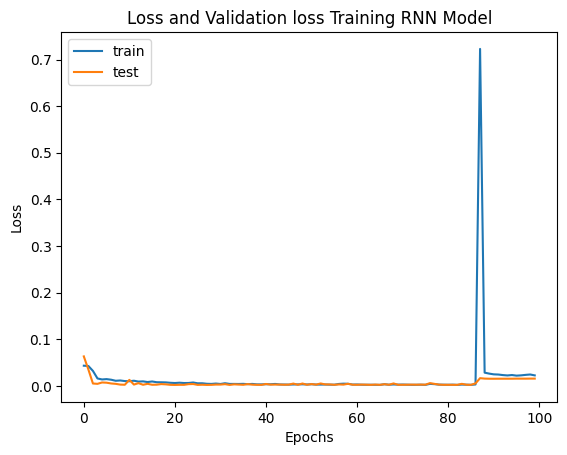

In [45]:
# plot history
pyplot.title('Loss and Validation loss Training RNN Model')
pyplot.plot(history_RNN.history['loss'], label='train')
pyplot.xlabel('Epochs')
pyplot.plot(history_RNN.history['val_loss'], label='test')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

In [46]:
# make a prediction
test_Y_predicted = RNN_Model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_day*n_features))

22/22 [==============================] - 1s 10ms/step


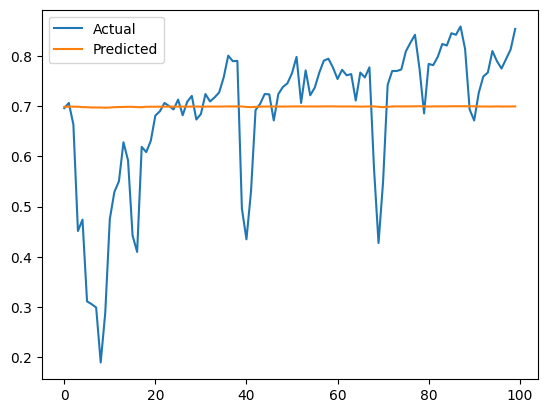

In [47]:
pyplot.plot(test_Y[:100],label="Actual")
pyplot.plot(test_Y_predicted[:100],label="Predicted")
pyplot.legend()

### rescale data

In [48]:
inv_test_Y_predicted = np.concatenate((test_Y_predicted,test_X[:,-(nTar-1):]),axis=1)
inv_test_Y_predicted = scaler.inverse_transform(inv_test_Y_predicted)
inv_test_Y_predicted = inv_test_Y_predicted[:,0]

In [49]:
test_Y = test_Y.reshape((len(test_Y), 1))
inv_test_Y = np.concatenate((test_Y,test_X[:,-(nTar-1):]),axis=1)
inv_test_Y = scaler.inverse_transform(inv_test_Y)
inv_test_Y = inv_test_Y[:,0]

In [50]:
ldate=tempdf['Date'].values
ldate=ldate[-len(test_Y):]

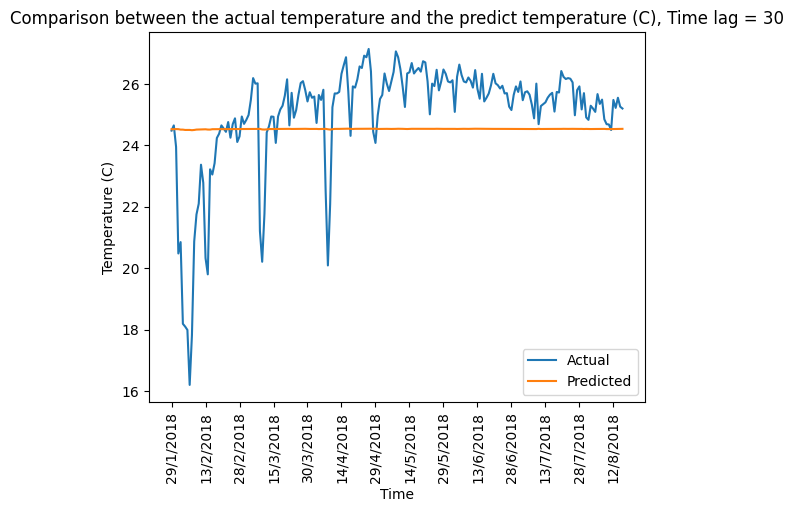

In [51]:
pyplot.title('Comparison between the actual temperature and the predict temperature (C), Time lag = {lag}'.format(lag=n_day))
pyplot.xlabel('Time')
pyplot.xticks(range(0, 200,15),rotation = 90)
pyplot.ylabel('Temperature (C)')
pyplot.plot(ldate[:200],inv_test_Y[:200],label="Actual")
pyplot.plot(ldate[:200],inv_test_Y_predicted[:200],label="Predicted")
pyplot.legend()

In [52]:
from math import sqrt
rmse_total = sqrt(mean_squared_error(inv_test_Y, inv_test_Y_predicted))
print('Test RMSE: %.3f' % rmse_total) 

Test RMSE: 2.042


In [53]:
train = values[:n_train_hours,:]
test = values[n_train_hours:, : ]

In [54]:
# split into input and outputs
n_obs = n_day * n_features
train_X,train_Y = train[:,:n_obs],train[:,-nTar]   # as at 6th no. from last is temp. our o/p var
print(train_X.shape)
print(train_Y.shape)
test_X,test_Y = test[:,:n_obs],test[:,-nTar]

(2920, 150)
(2920,)


In [55]:
# reshape input to be 3D [samples, timesteps, fetures]
train_X = train_X.reshape((train_X.shape[0],n_day,n_features))
test_X = test_X.reshape((test_X.shape[0],n_day,n_features))  # 24 = 3 * 8
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(2920, 30, 5) (2920,) (703, 30, 5) (703,)


## Create LSTM Model

In [56]:
model = Sequential()
model.add(LSTM(L1, input_shape=(train_X.shape[1], train_X.shape[2])))    
# test
model.add(Dense(dense_node,name='FC1'))  
model.add(Activation('relu'))
model.add(Dropout(0.2))
# end
model.add(Dense(1,name='out_layer'))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_squared_error'])

LSTM_Model = model
LSTM_Model._name = "LSTM"

In [57]:
LSTM_Model.summary()

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               164800    
                                                                 
 FC1 (Dense)                 (None, 50)                10050     
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 out_layer (Dense)           (None, 1)                 51        
                                                                 
Total params: 174901 (683.21 KB)
Trainable params: 174901 (683.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
history_LSTM = LSTM_Model.fit(train_X, train_Y, epochs=100, batch_size=32, validation_data=(test_X, test_Y), verbose=2, shuffle=False)

Epoch 1/100
92/92 - 11s - loss: 0.0454 - mean_squared_error: 0.0454 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - 11s/epoch - 123ms/step
Epoch 2/100
92/92 - 4s - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0102 - val_mean_squared_error: 0.0102 - 4s/epoch - 47ms/step
Epoch 3/100
92/92 - 4s - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0050 - val_mean_squared_error: 0.0050 - 4s/epoch - 48ms/step
Epoch 4/100
92/92 - 4s - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0117 - val_mean_squared_error: 0.0117 - 4s/epoch - 43ms/step
Epoch 5/100
92/92 - 5s - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0043 - val_mean_squared_error: 0.0043 - 5s/epoch - 53ms/step
Epoch 6/100
92/92 - 4s - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0069 - val_mean_squared_error: 0.0069 - 4s/epoch - 44ms/step
Epoch 7/100
92/92 - 5s - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0046 - val_mean_squared_error: 0.0046 - 5s/epoch - 49ms/step
Epo

Epoch 59/100
92/92 - 5s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0021 - val_mean_squared_error: 0.0021 - 5s/epoch - 56ms/step
Epoch 60/100
92/92 - 5s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0042 - val_mean_squared_error: 0.0042 - 5s/epoch - 52ms/step
Epoch 61/100
92/92 - 5s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0019 - val_mean_squared_error: 0.0019 - 5s/epoch - 58ms/step
Epoch 62/100
92/92 - 5s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0019 - val_mean_squared_error: 0.0019 - 5s/epoch - 56ms/step
Epoch 63/100
92/92 - 6s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0028 - val_mean_squared_error: 0.0028 - 6s/epoch - 60ms/step
Epoch 64/100
92/92 - 5s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0020 - val_mean_squared_error: 0.0020 - 5s/epoch - 51ms/step
Epoch 65/100
92/92 - 6s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0026 - val_mean_squared_error: 0.0026 - 6s/epoch - 64ms/step

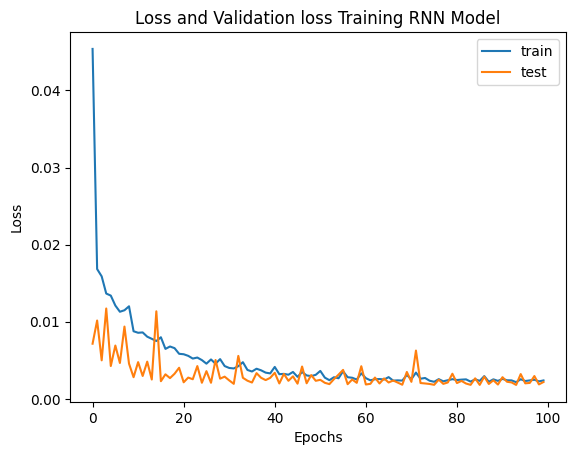

In [59]:
# plot history
pyplot.title('Loss and Validation loss Training RNN Model')
pyplot.plot(history_LSTM.history['loss'], label='train')
pyplot.xlabel('Epochs')
pyplot.plot(history_LSTM.history['val_loss'], label='test')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

In [60]:
# make a prediction
test_Y_predicted_LSTM = LSTM_Model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_day*n_features))

22/22 [==============================] - 2s 21ms/step


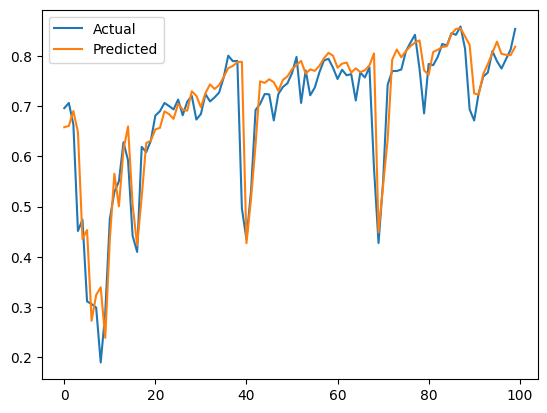

In [61]:
pyplot.plot(test_Y[:100],label="Actual")
pyplot.plot(test_Y_predicted_LSTM[:100],label="Predicted")
pyplot.legend()

### rescale data

In [62]:
inv_test_Y_predicted_LSTM = np.concatenate((test_Y_predicted_LSTM,test_X[:,-(nTar-1):]),axis=1)
inv_test_Y_predicted_LSTM = scaler.inverse_transform(inv_test_Y_predicted_LSTM)
inv_test_Y_predicted_LSTM = inv_test_Y_predicted_LSTM[:,0]

In [63]:
test_Y = test_Y.reshape((len(test_Y), 1))
inv_test_Y = np.concatenate((test_Y,test_X[:,-(nTar-1):]),axis=1)
inv_test_Y = scaler.inverse_transform(inv_test_Y)
inv_test_Y = inv_test_Y[:,0]

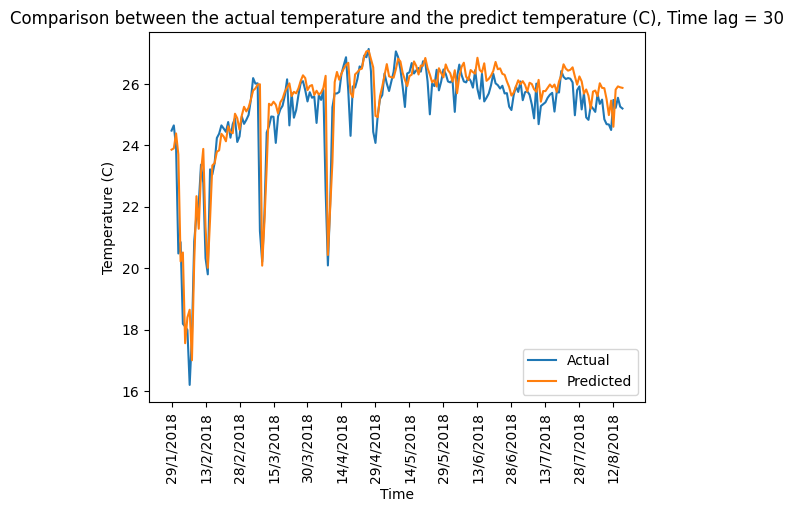

In [64]:
pyplot.title('Comparison between the actual temperature and the predict temperature (C), Time lag = {lag}'.format(lag=n_day))
pyplot.xlabel('Time')
pyplot.xticks(range(0, 200,15),rotation = 90)
pyplot.ylabel('Temperature (C)')
pyplot.plot(ldate[:200],inv_test_Y[:200],label="Actual")
pyplot.plot(ldate[:200],inv_test_Y_predicted_LSTM[:200],label="Predicted")
pyplot.legend()

In [65]:
rmse_total = sqrt(mean_squared_error(inv_test_Y, inv_test_Y_predicted_LSTM))
print('Test RMSE: %.3f' % rmse_total) 

Test RMSE: 0.763


## conclusion

### RNN Model

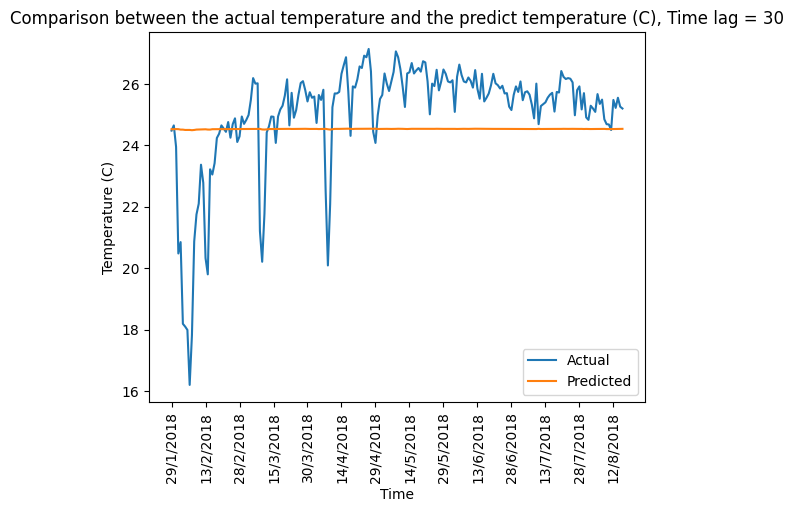

In [66]:
pyplot.title('Comparison between the actual temperature and the predict temperature (C), Time lag = {lag}'.format(lag=n_day))
pyplot.xlabel('Time')
pyplot.xticks(range(0, 200,15),rotation = 90)
pyplot.ylabel('Temperature (C)')
pyplot.plot(ldate[:200],inv_test_Y[:200],label="Actual")
pyplot.plot(ldate[:200],inv_test_Y_predicted[:200],label="Predicted")
pyplot.legend()

### LSTM Model

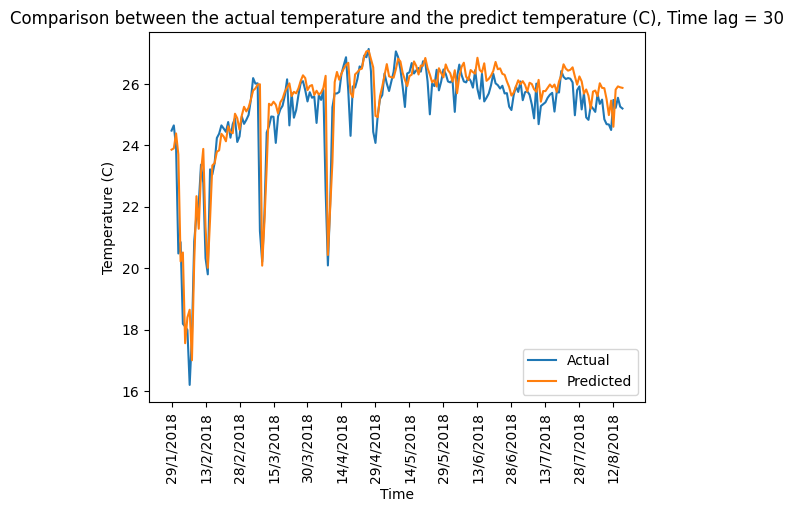

In [67]:
pyplot.title('Comparison between the actual temperature and the predict temperature (C), Time lag = {lag}'.format(lag=n_day))
pyplot.xlabel('Time')
pyplot.xticks(range(0, 200,15),rotation = 90)
pyplot.ylabel('Temperature (C)')
pyplot.plot(ldate[:200],inv_test_Y[:200],label="Actual")
pyplot.plot(ldate[:200],inv_test_Y_predicted_LSTM[:200],label="Predicted")
pyplot.legend()

In [68]:
rmse_total = sqrt(mean_squared_error(inv_test_Y, inv_test_Y_predicted))
print('Test RMSE: %.3f' % rmse_total) 

Test RMSE: 2.042


In [69]:
rmse_total = sqrt(mean_squared_error(inv_test_Y, inv_test_Y_predicted_LSTM))
print('LSTM Test RMSE: %.3f' % rmse_total) 

LSTM Test RMSE: 0.763
